# 1. Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import datetime

# 2. Load data

In [27]:
merged = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/snd_local_nivel_merged.csv',index_col=0, parse_dates=True)

# 3. Plotting

## 3.1 Overview

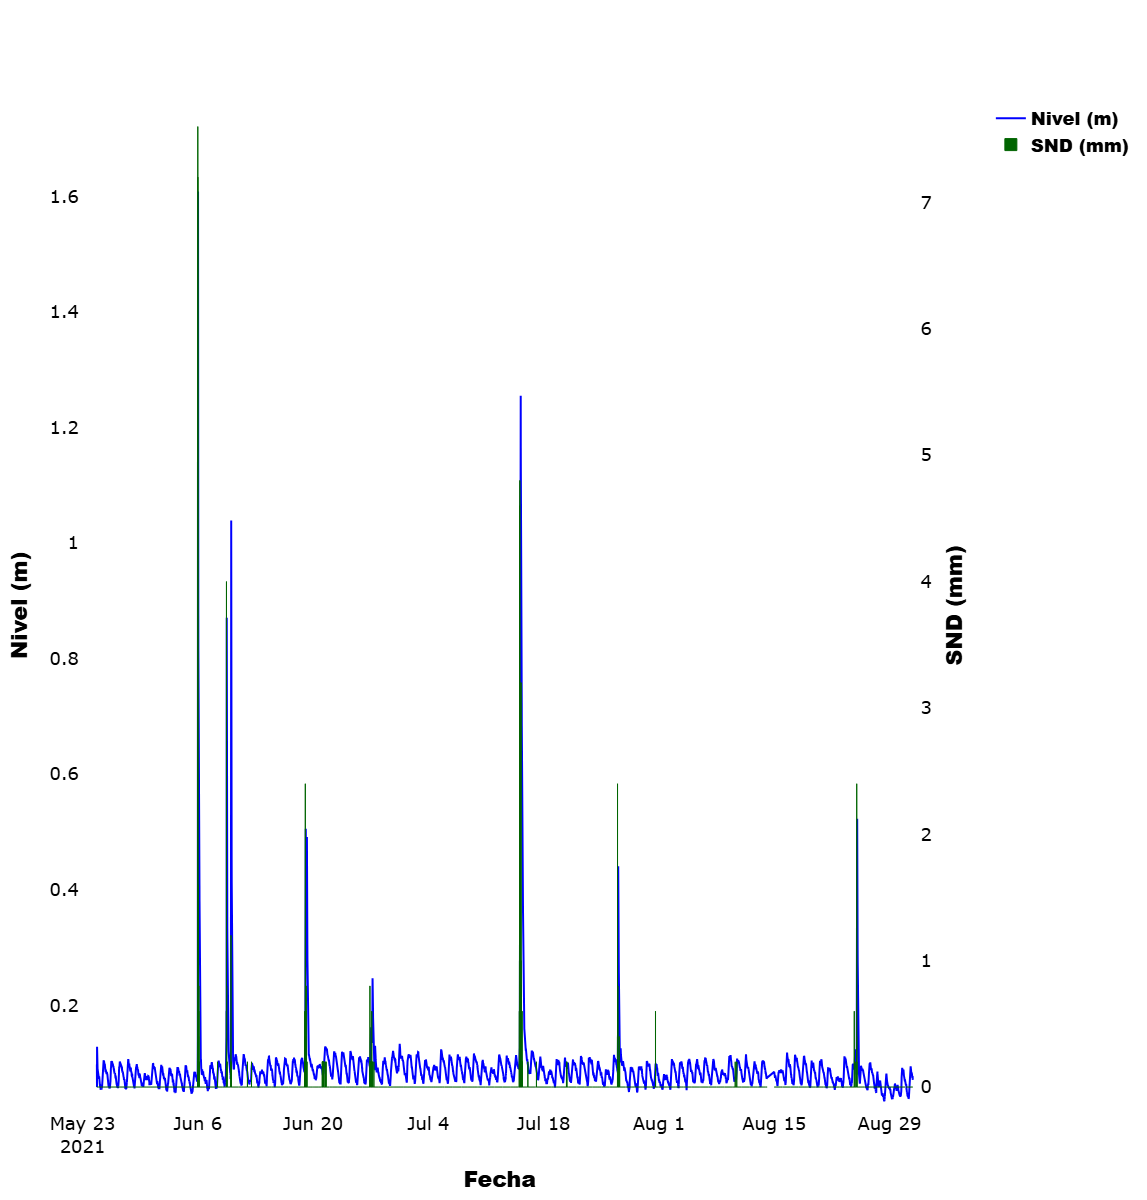

In [19]:


# Crear subgráficos con un eje secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Agregar la serie de nivel de agua
fig.add_trace(
    go.Scatter(
        x=merged.index,
        y=merged["nivel"],
        mode="lines",
        line=dict(color='blue'),
        name="Nivel (m)"
    ),
    secondary_y=False
)

# Agregar la serie de precipitación SIL como barras
fig.add_trace(
    go.Bar(
        x=merged.index,
        y=merged["snd"],
        name="SND (mm)",
        marker=dict(
            color="darkgreen",        
            opacity=1,             
            line=dict(
                color="darkgreen",   
                width=1           
            )
        ),
    ),
    secondary_y=True
)

# Configuración del diseño
fig.update_layout(
    
    xaxis_title="Fecha",
    legend=dict(
        x=1.02,
        y=1,
        bgcolor='rgba(255,255,255,0)',
        font=dict(
            family="Arial Black",  # Fuente más gruesa
            size=18,               # Tamaño más grande
            color="black"          # Color negro
        )
    ),
    plot_bgcolor='white',   
    paper_bgcolor='white',
    autosize=False,
    width=1200,  # Manteniendo relación 1:1
    height=1200
)

# Ajuste del tamaño y grosor de las etiquetas de los ejes
fig.update_xaxes(
    title_text="Fecha",
    title_font=dict(size=22, family="Arial Black", color="black"),  # Más grande y grueso
    tickfont=dict(size=18, color="black")  # Aumenta tamaño de los valores del eje
)

fig.update_yaxes(
    title_text="Nivel (m)",
    title_font=dict(size=22, family="Arial Black", color="black"),  # Más grande y grueso
    tickfont=dict(size=18, color="black"),
    secondary_y=False
)

fig.update_yaxes(
    title_text="SND (mm)",
    title_font=dict(size=22, family="Arial Black", color="black"),  # Más grande y grueso
    tickfont=dict(size=18, color="black"),
    secondary_y=True
)

# Mostrar el gráfico
fig.show()

## 3.2 Zoom selection

In [28]:
def pedir_fecha(mensaje):
    print(mensaje)
    year = int(input("Año: "))
    month = int(input("Mes: "))
    day = int(input("Día: "))
    hour = int(input("Hora: "))
    minute = int(input("Minuto: "))
    second = int(input("Segundo: "))
    return datetime.datetime(year, month, day, hour, minute, second)

Ingrese la fecha de inicio:


Año:  2021
Mes:  7
Día:  26
Hora:  21
Minuto:  0
Segundo:  0


Ingrese la fecha de fin:


Año:  2021
Mes:  7
Día:  27
Hora:  12
Minuto:  0
Segundo:  0


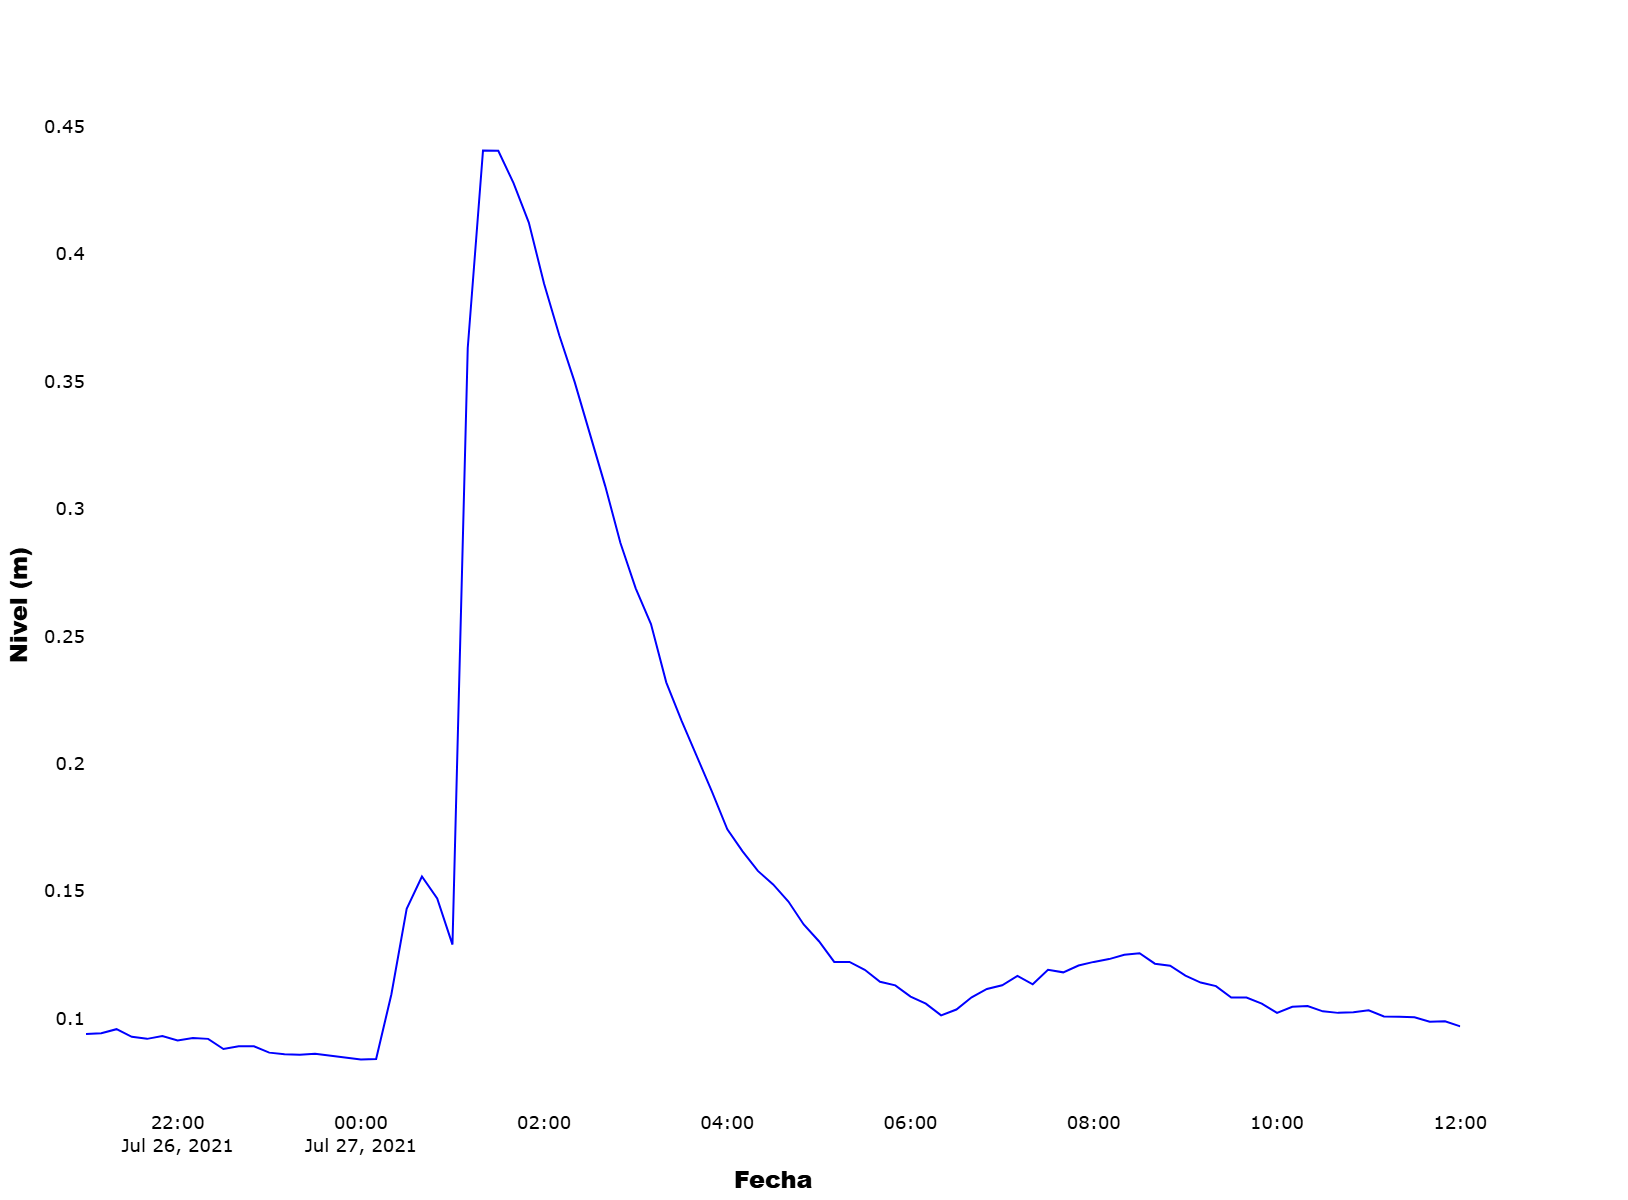

In [29]:
# Filtrar los datos en el rango de fechas especificado
fecha_inicio = pedir_fecha("Ingrese la fecha de inicio:")
fecha_fin = pedir_fecha("Ingrese la fecha de fin:")
merged_filtered = merged.loc[(merged.index >= fecha_inicio) & (merged.index <= fecha_fin)]

# Crear la figura con eje secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Agregar la serie de nivel de agua
fig.add_trace(
    go.Scatter(
        x=merged_filtered.index,
        y=merged_filtered["nivel"],
        mode="lines",
        line=dict(color='blue'),
        name="Nivel (m)"
    ),
    secondary_y=False
)

# Agregar la serie de precipitación SIL como barras
fig.add_trace(
    go.Bar(
        x=merged_filtered.index,
        y=merged_filtered["snd"],
        name="SND (mm)",
        marker=dict(
            color="darkgreen",
            opacity=1,
            line=dict(
                color="darkgreen",
                width=1
            )
        ),
    ),
    secondary_y=True
)

# Configuración del diseño
fig.update_layout(
    xaxis_title="Fecha",
    legend=dict(
        x=1.02,
        y=1,
        bgcolor='rgba(255,255,255,0)',
        font=dict(
            family="Arial Black",  # Fuente más gruesa
            size=20,               # Tamaño más grande
            color="black"
        )
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    autosize=False,
    width=1200,  # Relación 1:1 cuadrada
    height=1200
)

# Ajuste del tamaño y grosor de las etiquetas de los ejes
fig.update_xaxes(
    title_text="Fecha",
    title_font=dict(size=24, family="Arial Black", color="black"),  # Más grande y en negrita
    tickfont=dict(size=18, color="black")  # Números en los ejes en negro
)

fig.update_yaxes(
    title_text="Nivel (m)",
    title_font=dict(size=24, family="Arial Black", color="black"),  # Más grande y en negrita
    tickfont=dict(size=18, color="black"),  # Números en los ejes en negro
    secondary_y=False
)

fig.update_yaxes(
    title_text="SIL (mm)",
    title_font=dict(size=24, family="Arial Black", color="black"),  # Más grande y en negrita
    tickfont=dict(size=18, color="black"),  # Números en los ejes en negro
    secondary_y=True
)

# Mostrar el gráfico
fig.show()

## 3.3 Peaks

Ingrese la fecha de inicio:


Año:  2021
Mes:  7
Día:  26
Hora:  21
Minuto:  0
Segundo:  0


Ingrese la fecha de fin:


Año:  2021
Mes:  7
Día:  27
Hora:  12
Minuto:  0
Segundo:  0


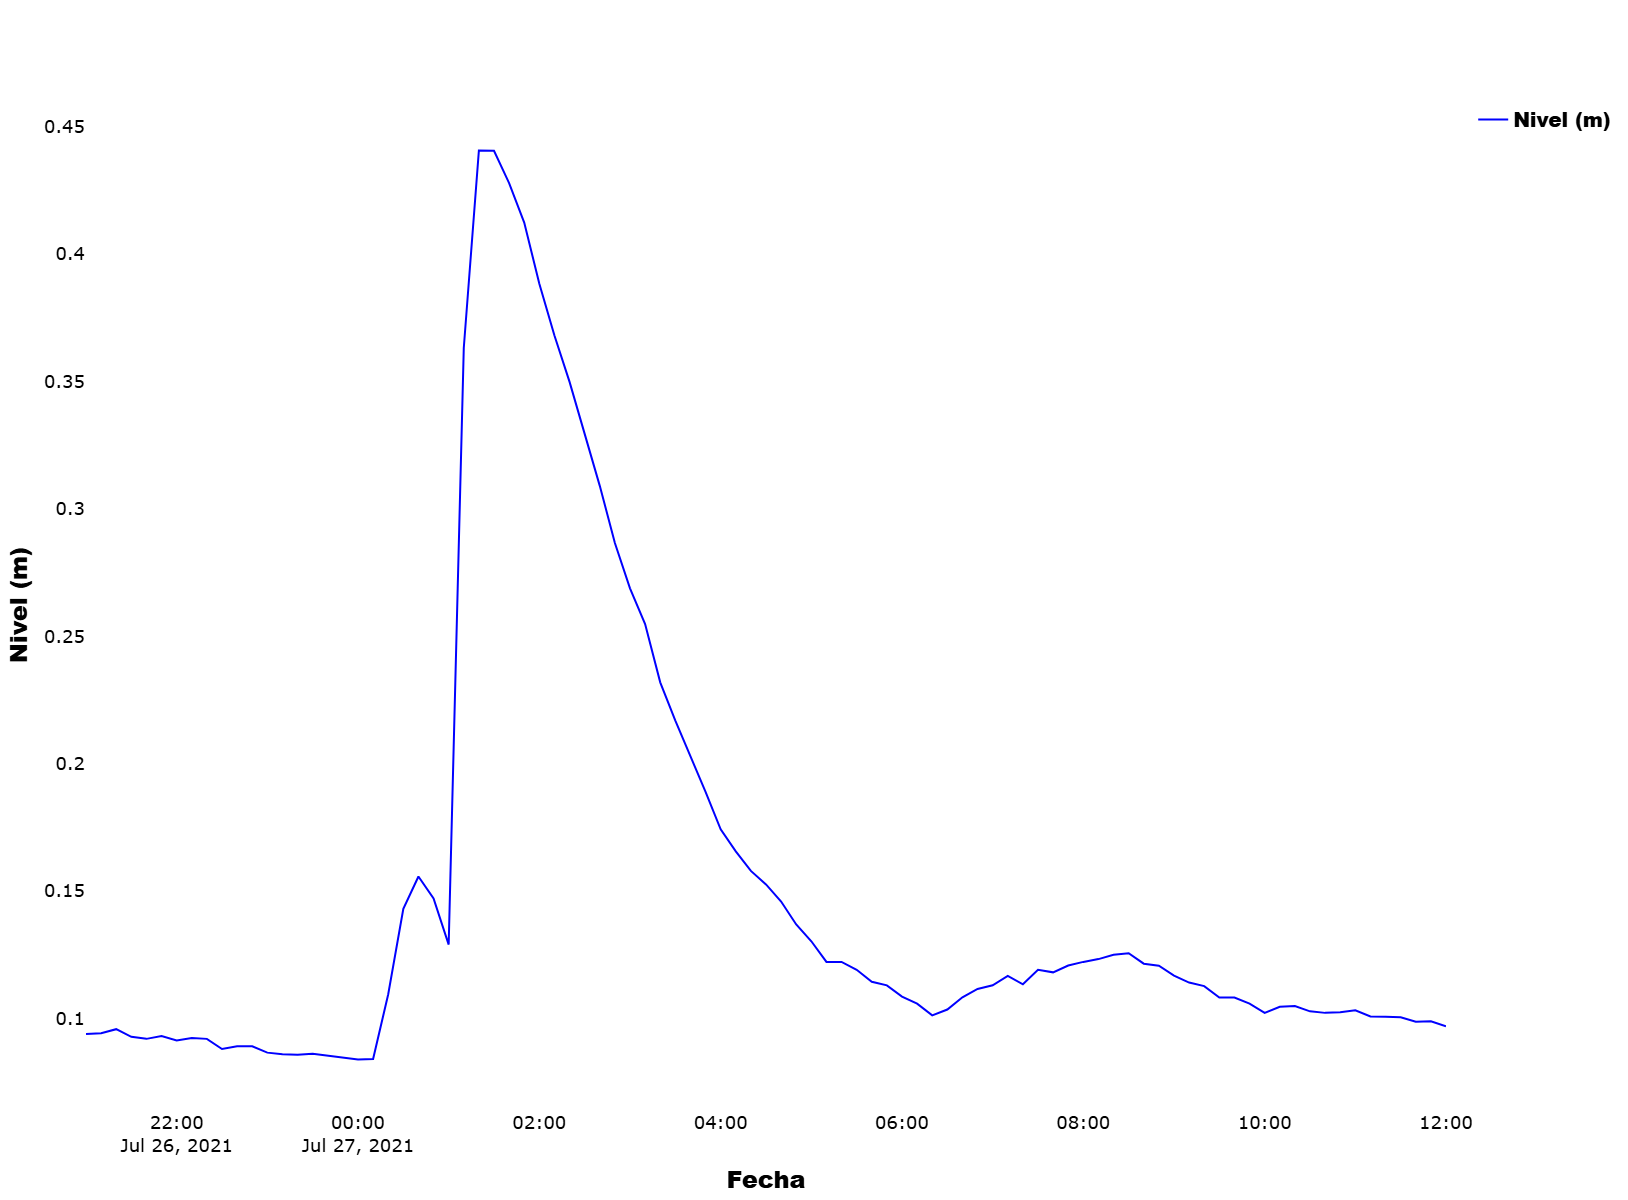

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Filtrar los datos en el rango de fechas especificado
fecha_inicio = pedir_fecha("Ingrese la fecha de inicio:")
fecha_fin = pedir_fecha("Ingrese la fecha de fin:")
merged_filtered = merged.loc[(merged.index >= fecha_inicio) & (merged.index <= fecha_fin)]

# Crear la figura SIN eje secundario
fig = go.Figure()

# Agregar la serie de nivel de agua
fig.add_trace(
    go.Scatter(
        x=merged_filtered.index,
        y=merged_filtered["nivel"],
        mode="lines",
        line=dict(color='blue'),
        name="Nivel (m)",
        showlegend=True
    )
)

# Configuración del diseño
fig.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Nivel (m)",
    legend=dict(
        x=1.02,
        y=1,
        bgcolor='rgba(255,255,255,0)',
        font=dict(
            family="Arial Black",
            size=20,
            color="black"
        )
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    autosize=False,
    width=1200,  # Relación 1:1 cuadrada
    height=1200
)

# Ajuste del tamaño y grosor de las etiquetas de los ejes
fig.update_xaxes(
    title_text="Fecha",
    title_font=dict(size=24, family="Arial Black", color="black"),
    tickfont=dict(size=18, color="black")
)

fig.update_yaxes(
    title_text="Nivel (m)",
    title_font=dict(size=24, family="Arial Black", color="black"),
    tickfont=dict(size=18, color="black")
)

# Mostrar el gráfico
fig.show()